# Baseline classifier
ReLU activation, 4 layers, 100 neurons per layer
Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelRelu', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])

('\nTraining on', 31, 'features:', ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py'])


## Import data

In [12]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

(2, 'classes found, running in binary mode\n')

______________________________________
Training finished
Cross-validation took 17.977s 


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


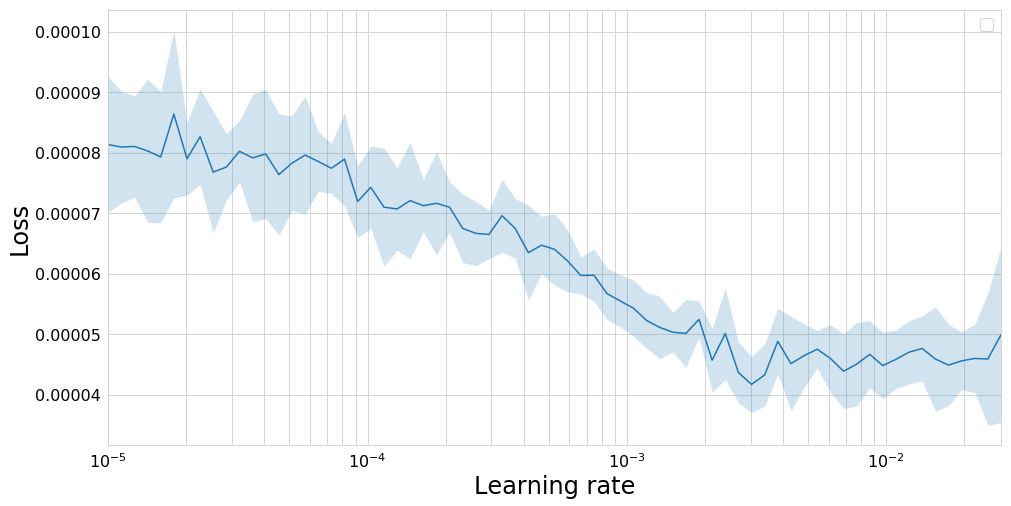

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
('Running fold', 1, '/', 10)
(2, 'classes found, running in binary mode\n')
1 New best found: 4.05010305029e-05
2 New best found: 3.78294817347e-05
3 New best found: 3.72074617493e-05
4 New best found: 3.67317579457e-05
5 New best found: 3.58751308443e-05
6 New best found: 3.53922189199e-05
7 New best found: 3.53346156104e-05
10 New best found: 3.51045087187e-05
11 New best found: 3.50587380479e-05
12 New best found: 3.49196489886e-05
13 New best found: 3.45577654047e-05
14 New best found: 3.43322217505e-05
15 New best found: 3.43300442344e-05
22 New best found: 3.40641863849e-05
24 New best found: 3.38818754912e-05
27 New best found: 3.38081237887e-05
29 New best found: 3.3705273259e-05
30 New best found: 3.36911667527e-05
48 New best found: 3.35375724381e-05
55 New best found: 3.34677161082e-05
56 New best found: 3.33646997736e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.000227778526495
Early stopping after 137

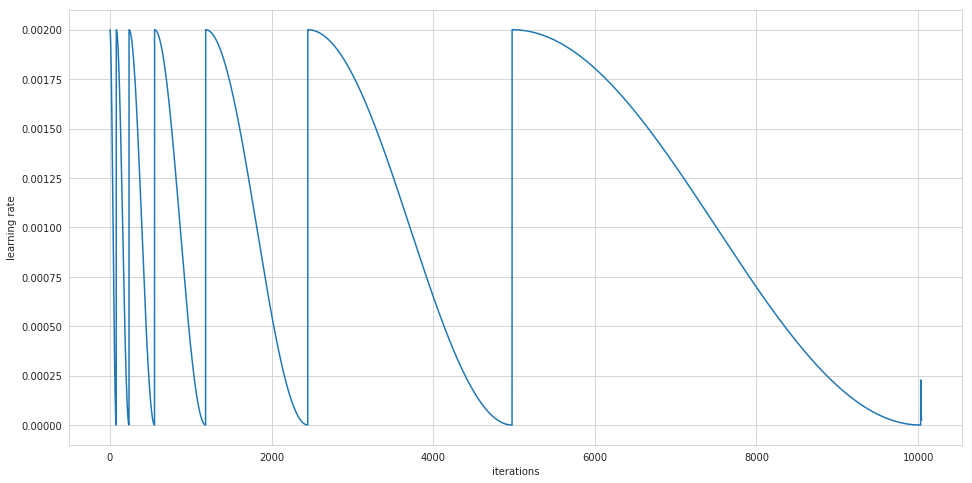

Fold took 438.070s

('Running fold', 2, '/', 10)
1 New best found: 4.12511658928e-05
2 New best found: 3.85765324708e-05
3 New best found: 3.71742810934e-05
4 New best found: 3.67780974709e-05
5 New best found: 3.62046626227e-05
6 New best found: 3.59496033652e-05
7 New best found: 3.56836796031e-05
10 New best found: 3.55349282113e-05
11 New best found: 3.50734705781e-05
12 New best found: 3.48329978671e-05
13 New best found: 3.45503324078e-05
14 New best found: 3.45371635353e-05
22 New best found: 3.42405472913e-05
26 New best found: 3.39857346199e-05
27 New best found: 3.39611315464e-05
28 New best found: 3.38503206589e-05
44 New best found: 3.38413269052e-05
46 New best found: 3.37218839643e-05
50 New best found: 3.37050124509e-05
53 New best found: 3.3539346338e-05
55 New best found: 3.35262292337e-05
57 New best found: 3.34940696395e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.000169221455066
Early stopping after 137 epochs
('Score is:', {'loss': 3.349

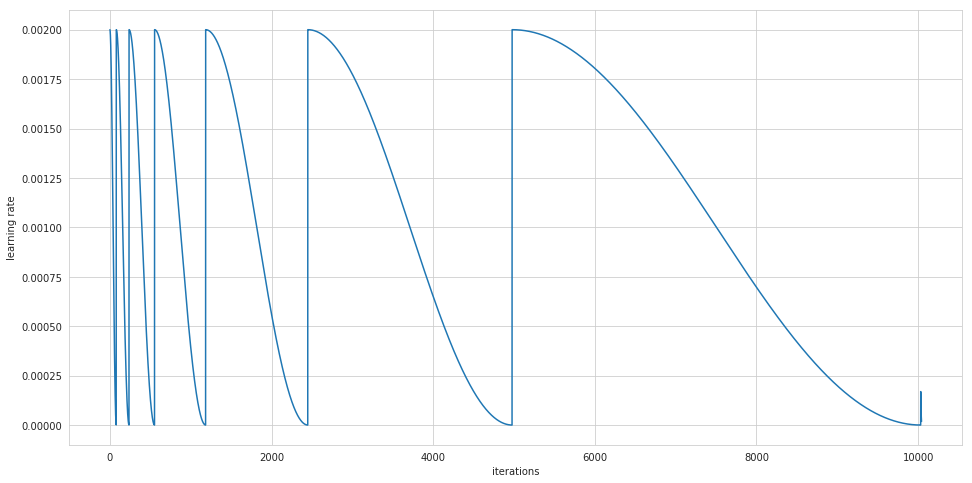

Fold took 424.723s

('Running fold', 3, '/', 10)
1 New best found: 4.07270451599e-05
2 New best found: 3.81696619912e-05
3 New best found: 3.69864504144e-05
4 New best found: 3.67101013908e-05
5 New best found: 3.65021485915e-05
6 New best found: 3.53275222549e-05
7 New best found: 3.51389893822e-05
10 New best found: 3.46210885148e-05
11 New best found: 3.44542287417e-05
12 New best found: 3.41121203368e-05
13 New best found: 3.38052462153e-05
14 New best found: 3.35371017033e-05
23 New best found: 3.34869302136e-05
24 New best found: 3.33226094806e-05
26 New best found: 3.29802476933e-05
28 New best found: 3.29403245233e-05
29 New best found: 3.28934879841e-05
30 New best found: 3.28586755415e-05
31 New best found: 3.2852804978e-05
50 New best found: 3.28299475006e-05
53 New best found: 3.27969799624e-05
55 New best found: 3.26611344535e-05
56 New best found: 3.26193156075e-05
57 New best found: 3.26188170049e-05
58 New best found: 3.25925534033e-05
59 New best found: 3.25358618346e-

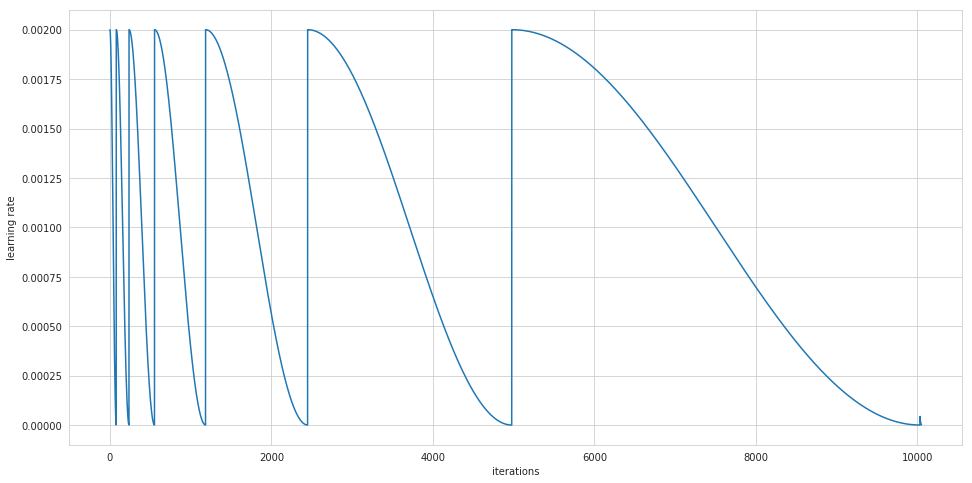

Fold took 432.028s

('Running fold', 4, '/', 10)
1 New best found: 3.90059765661e-05
2 New best found: 3.66685737172e-05
3 New best found: 3.59908401791e-05
5 New best found: 3.55511746428e-05
6 New best found: 3.50450621627e-05
7 New best found: 3.49147064189e-05
10 New best found: 3.46273305506e-05
12 New best found: 3.41512107727e-05
13 New best found: 3.38323047516e-05
14 New best found: 3.37509989069e-05
24 New best found: 3.35475519896e-05
25 New best found: 3.33133462409e-05
26 New best found: 3.32795839509e-05
27 New best found: 3.31153583465e-05
29 New best found: 3.30618219945e-05
30 New best found: 3.30364326364e-05
31 New best found: 3.30269584243e-05
49 New best found: 3.29820460443e-05
51 New best found: 3.28866994023e-05
53 New best found: 3.28206911101e-05
57 New best found: 3.27133047962e-05
58 New best found: 3.26801356219e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.000118665235633
Early stopping after 137 epochs
('Score is:', {'loss': 3.2

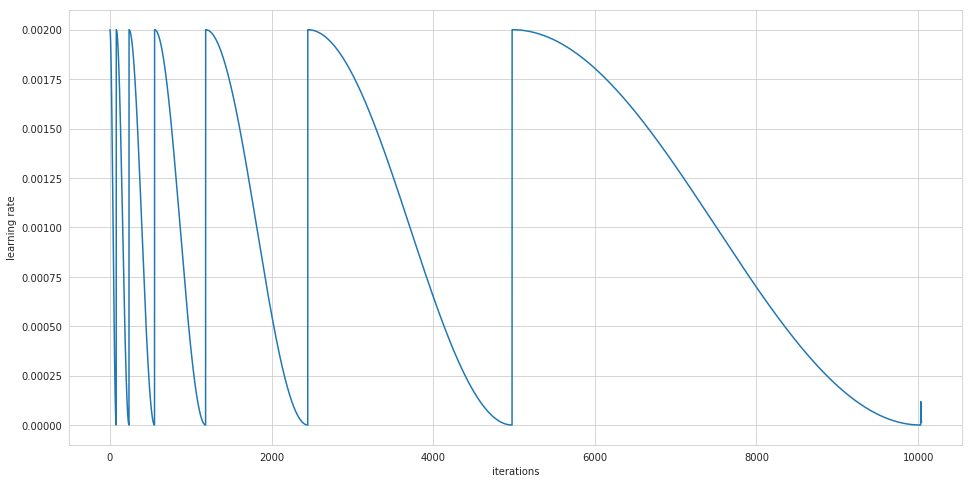

Fold took 396.701s

('Running fold', 5, '/', 10)
1 New best found: 4.11058618658e-05
2 New best found: 3.81614499405e-05
3 New best found: 3.67695507273e-05
5 New best found: 3.54963011239e-05
6 New best found: 3.49001256356e-05
7 New best found: 3.48059953394e-05
10 New best found: 3.43791645821e-05
11 New best found: 3.43459904485e-05
12 New best found: 3.37752680847e-05
13 New best found: 3.36597496716e-05
14 New best found: 3.35752030864e-05
15 New best found: 3.35051304777e-05
23 New best found: 3.34622491166e-05
24 New best found: 3.3295779374e-05
25 New best found: 3.3083624109e-05
27 New best found: 3.29810697542e-05
28 New best found: 3.2940288329e-05
29 New best found: 3.29098318631e-05
30 New best found: 3.28995949618e-05
31 New best found: 3.28981480241e-05
48 New best found: 3.27636919697e-05
50 New best found: 3.27587398206e-05
52 New best found: 3.27104547454e-05
53 New best found: 3.27021335528e-05
54 New best found: 3.26973547461e-05
55 New best found: 3.26930967349e-0

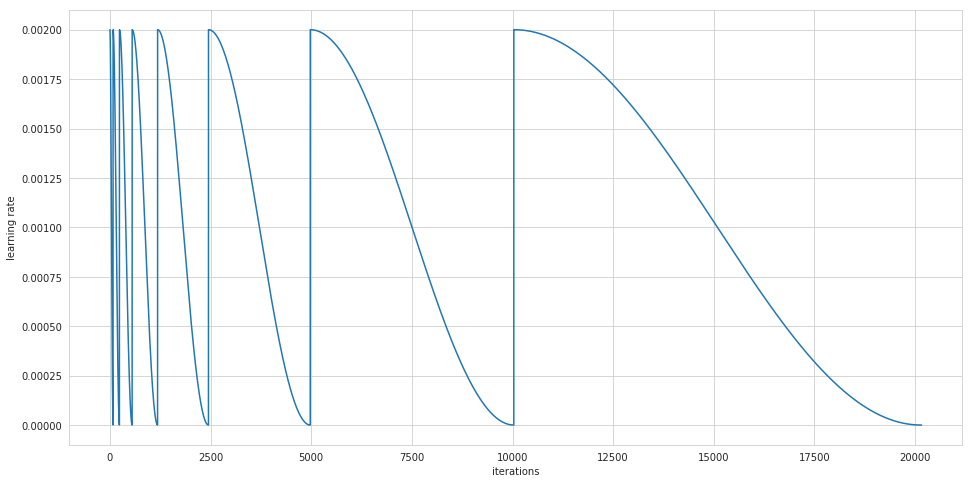

Fold took 836.764s

('Running fold', 6, '/', 10)
1 New best found: 4.05202860406e-05
2 New best found: 3.70390609736e-05
3 New best found: 3.6505911751e-05
5 New best found: 3.55338628433e-05
6 New best found: 3.49398976177e-05
7 New best found: 3.47931892597e-05
11 New best found: 3.40889926534e-05
12 New best found: 3.40424463648e-05
13 New best found: 3.38658927198e-05
14 New best found: 3.36609000617e-05
15 New best found: 3.36372289952e-05
23 New best found: 3.32369876371e-05
25 New best found: 3.30986674511e-05
27 New best found: 3.29801750937e-05
28 New best found: 3.29587818429e-05
29 New best found: 3.29568800662e-05
30 New best found: 3.29335881543e-05
31 New best found: 3.29303959341e-05
46 New best found: 3.28940350693e-05
47 New best found: 3.27236976882e-05
50 New best found: 3.27088763283e-05
56 New best found: 3.2674740885e-05
58 New best found: 3.26287417905e-05
59 New best found: 3.26213771128e-05
60 New best found: 3.25730712168e-05
62 New best found: 3.25601176984e-

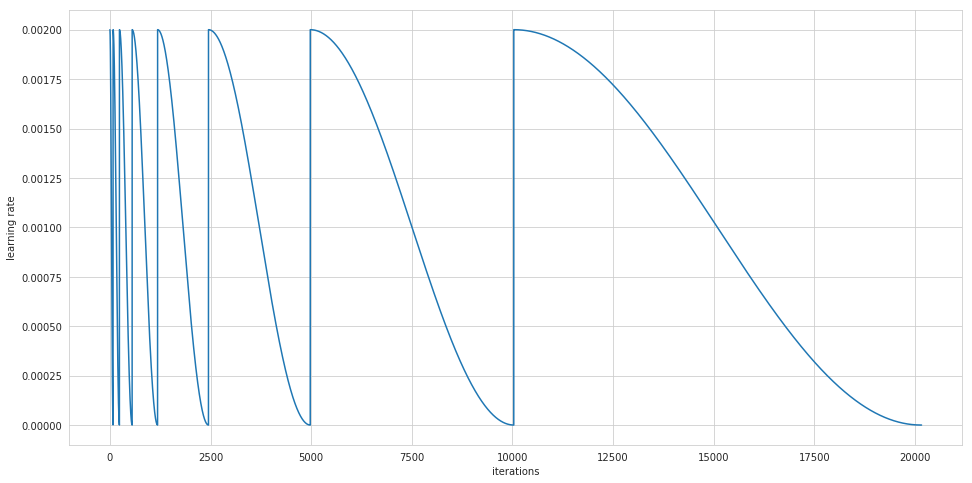

Fold took 854.925s

('Running fold', 7, '/', 10)
1 New best found: 3.87907513883e-05
2 New best found: 3.75364237538e-05
3 New best found: 3.61498274593e-05
4 New best found: 3.57945643394e-05
5 New best found: 3.50095547197e-05
6 New best found: 3.46278457029e-05
7 New best found: 3.44586539111e-05
11 New best found: 3.41103376297e-05
12 New best found: 3.36559555552e-05
13 New best found: 3.35460002738e-05
14 New best found: 3.34934966799e-05
15 New best found: 3.33969899264e-05
23 New best found: 3.29850953538e-05
24 New best found: 3.27252229254e-05
26 New best found: 3.2627176994e-05
28 New best found: 3.25713506289e-05
29 New best found: 3.25460891661e-05
44 New best found: 3.25372724968e-05
50 New best found: 3.23894385481e-05
51 New best found: 3.23562892983e-05
52 New best found: 3.22260560934e-05
53 New best found: 3.21303910969e-05
55 New best found: 3.20513553146e-05
61 New best found: 3.20443935037e-05
62 New best found: 3.20397660747e-05
63 New best found: 3.20392260212e-

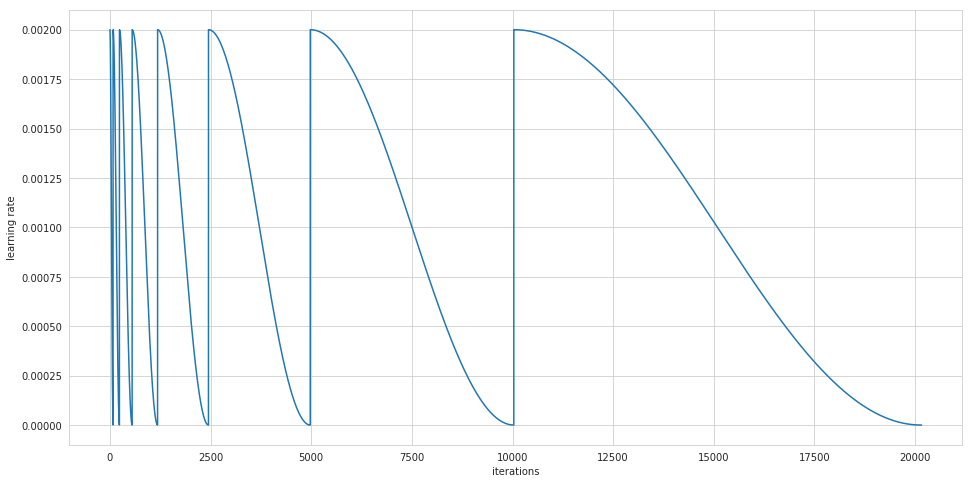

Fold took 784.151s

('Running fold', 8, '/', 10)


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111458). Check your callbacks.
  % delta_t_median)


1 New best found: 4.03296811439e-05
2 New best found: 3.74486498483e-05
3 New best found: 3.63131098694e-05
5 New best found: 3.54405600123e-05
6 New best found: 3.46996259128e-05
7 New best found: 3.46189496399e-05
11 New best found: 3.42829761721e-05
12 New best found: 3.37580474867e-05
13 New best found: 3.37554801156e-05
14 New best found: 3.3594183903e-05
15 New best found: 3.34913695741e-05
21 New best found: 3.33048499671e-05
23 New best found: 3.32557281182e-05
24 New best found: 3.29933945278e-05
25 New best found: 3.29384353426e-05
26 New best found: 3.2923530782e-05
27 New best found: 3.26081262929e-05
30 New best found: 3.25931616046e-05
46 New best found: 3.25547442178e-05
48 New best found: 3.24988480332e-05
51 New best found: 3.24854403759e-05
54 New best found: 3.23779646969e-05
57 New best found: 3.22890308631e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.000169221455066
Early stopping after 137 epochs
('Score is:', {'loss': 3.228903086305234

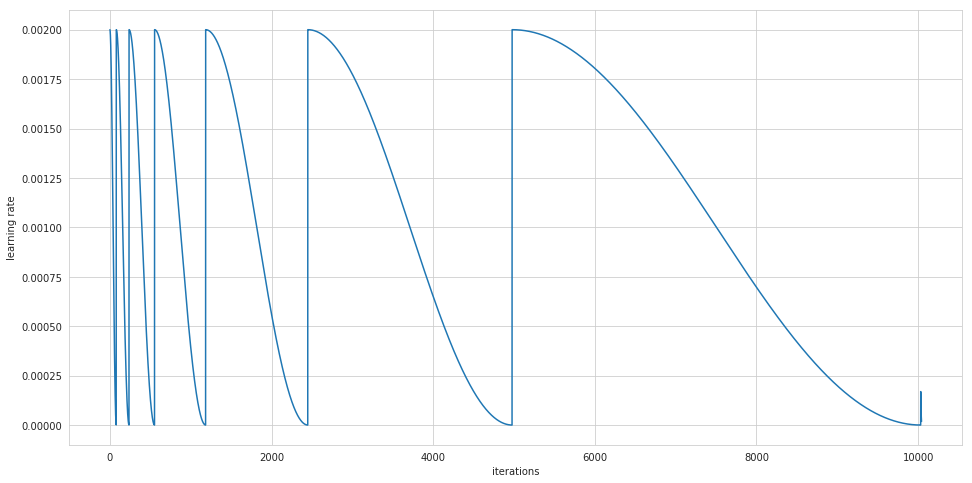

Fold took 450.018s

('Running fold', 9, '/', 10)


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151088). Check your callbacks.
  % delta_t_median)


1 New best found: 4.05592532127e-05
2 New best found: 3.79817730473e-05
3 New best found: 3.68163027612e-05
5 New best found: 3.60399687516e-05
6 New best found: 3.56317954668e-05
7 New best found: 3.53543813749e-05
9 New best found: 3.51271750324e-05
11 New best found: 3.45731079741e-05
12 New best found: 3.42815541019e-05
13 New best found: 3.42053105614e-05
14 New best found: 3.40338189289e-05
15 New best found: 3.40067973377e-05
22 New best found: 3.36705199379e-05
25 New best found: 3.34773008329e-05
28 New best found: 3.33869645169e-05
29 New best found: 3.32493186289e-05
44 New best found: 3.31432281061e-05
47 New best found: 3.30569192817e-05
51 New best found: 3.30384617883e-05
52 New best found: 3.30302279794e-05
55 New best found: 3.28845805824e-05
56 New best found: 3.28592233075e-05
58 New best found: 3.28535607064e-05
59 New best found: 3.28193103561e-05
61 New best found: 3.28008262579e-05
62 New best found: 3.27961105464e-05
CosineAnneal stalling after 127 epochs, enter

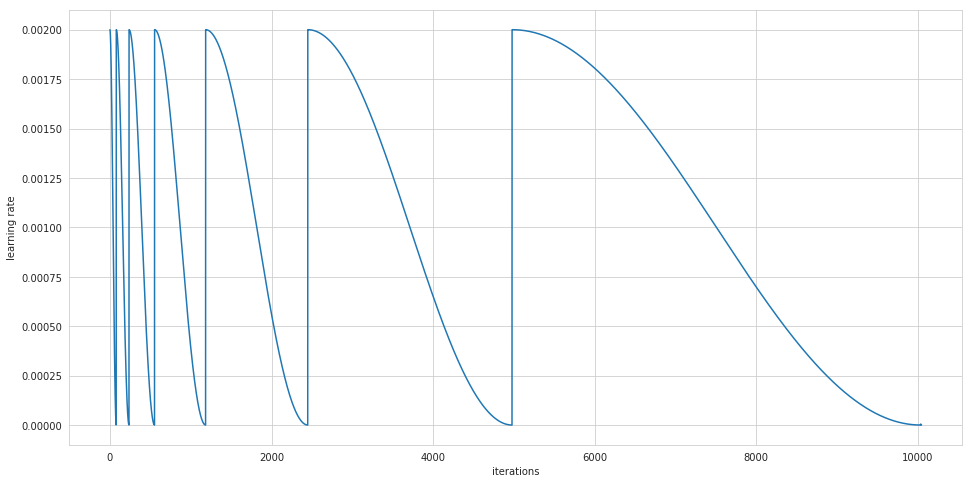

Fold took 459.642s

('Running fold', 10, '/', 10)


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176740). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9241403478e-05
2 New best found: 3.76636408812e-05
3 New best found: 3.71774737252e-05
4 New best found: 3.68691451561e-05
5 New best found: 3.62147234831e-05
6 New best found: 3.58042251874e-05
7 New best found: 3.56515891795e-05
10 New best found: 3.52873998196e-05
11 New best found: 3.51202578954e-05
12 New best found: 3.46754742824e-05
13 New best found: 3.44262614823e-05
14 New best found: 3.43748643815e-05
15 New best found: 3.4294566438e-05
22 New best found: 3.41082190405e-05
25 New best found: 3.38158592963e-05
26 New best found: 3.380159388e-05
28 New best found: 3.37133354197e-05
30 New best found: 3.36437837363e-05
46 New best found: 3.3594628781e-05
49 New best found: 3.33493170169e-05
50 New best found: 3.32627807981e-05
55 New best found: 3.31331165717e-05
59 New best found: 3.31295353186e-05
60 New best found: 3.31245797346e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.34211473339e-05
Early stopping after 137 epochs
('Score

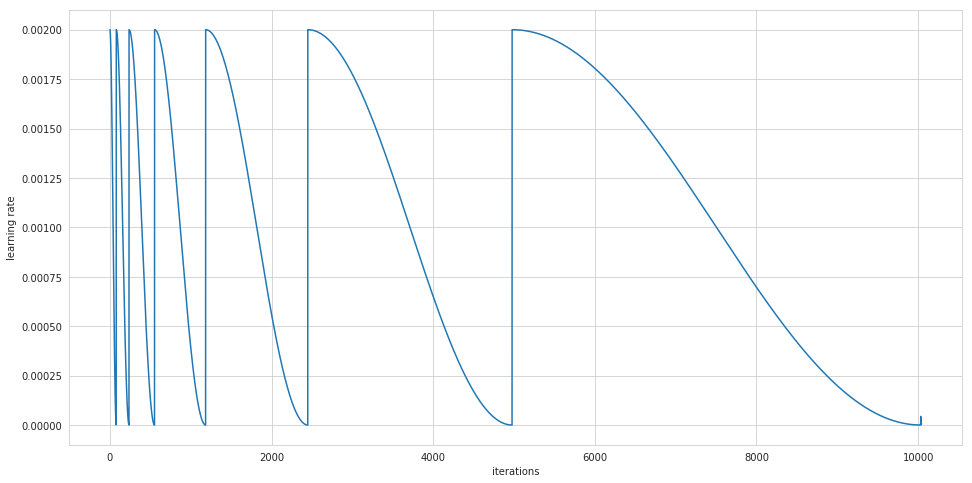

Fold took 578.694s


______________________________________
Training finished
Cross-validation took 5660.062s 


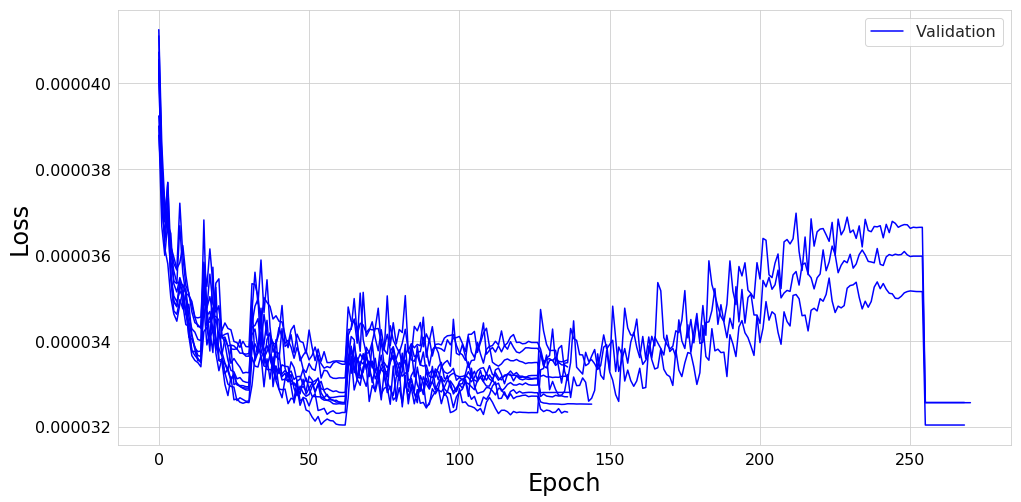

('Mean', 'loss', '= 3.27e-05 +- 1e-07')
('Mean', 'AUC', '= 0.1061 +- 0.0005')
('Mean', 'cut', '= 0.953 +- 0.006')
('Mean', 'wAUC', '= 0.0672 +- 0.0006')
('Mean', 'AMS', '= 3.68 +- 0.09')
______________________________________



<Figure size 432x288 with 0 Axes>

In [5]:
more_args = modelParams.copy()
more_args['compileArgs'] = compileArgs.copy()
more_args['compileArgs']['lr'] = 2e-3  # was 1e-3
patience = 2  # is 50 above
results, histories = batchTrainClassifier(trainData, nSplits, getModel, more_args,
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,  # this line added
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [6]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [7]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

('Choosing ensemble by', 'loss')
('Model', 0, 'is', 6, 'with', 'loss', '=', 3.203922589600552e-05)
('Model', 1, 'is', 7, 'with', 'loss', '=', 3.228903086305234e-05)
('Model', 2, 'is', 2, 'with', 'loss', '=', 3.2519064146929215e-05)
('Model', 3, 'is', 5, 'with', 'loss', '=', 3.2559845193463846e-05)
('Model', 4, 'is', 4, 'with', 'loss', '=', 3.256477623508545e-05)
('Model', 5, 'is', 3, 'with', 'loss', '=', 3.268013562192209e-05)
('Model', 6, 'is', 8, 'with', 'loss', '=', 3.2790317391993583e-05)
('Model', 7, 'is', 9, 'with', 'loss', '=', 3.312457973463931e-05)
('Model', 8, 'is', 0, 'with', 'loss', '=', 3.336469977363685e-05)
('Model', 9, 'is', 1, 'with', 'loss', '=', 3.34940696394583e-05)


## Response on validation datawith no ensembling

In [18]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [19]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00011588139534s per sample

Predicting batch 2 out of 10
Prediction took 4.20361995697e-05s per sample

Predicting batch 3 out of 10
Prediction took 4.47601795197e-05s per sample

Predicting batch 4 out of 10
Prediction took 4.41353797913e-05s per sample

Predicting batch 5 out of 10
Prediction took 3.91075611115e-05s per sample

Predicting batch 6 out of 10
Prediction took 7.42602348328e-05s per sample

Predicting batch 7 out of 10
Prediction took 8.67308139801e-05s per sample

Predicting batch 8 out of 10
Prediction took 9.03677940369e-05s per sample

Predicting batch 9 out of 10
Prediction took 0.000449541378021s per sample

Predicting batch 10 out of 10
Prediction took 0.000113488817215s per sample

CPU times: user 7.18 s, sys: 18.4 s, total: 25.6 s
Wall time: 5.53 s


In [20]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.894346677657, weighted 0.931231890158


In [11]:
%%time
amsScanSlow(convertToDF(valData.source))

(50000, 'candidates loaded')
CPU times: user 19.2 s, sys: 0 ns, total: 19.2 s
Wall time: 41.5 s


(3.574477842890102, 0.9527582)

In [12]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

(50000, 'candidates loaded')

Mean AMS=3.6+-0.1, at mean cut of 0.95+-0.01
Exact mean cut 0.947619539453, corresponds to AMS of 3.52228979407
CPU times: user 2.71 s, sys: 10 s, total: 12.7 s
Wall time: 57.8 s


(3.6, 0.95)

# Test scoring with no ensembling

In [ ]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [14]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000155505817587s per sample

Predicting batch 2 out of 10
Prediction took 0.000163639346036s per sample

Predicting batch 3 out of 10
Prediction took 0.000156451381337s per sample

Predicting batch 4 out of 10
Prediction took 0.000183739402077s per sample

Predicting batch 5 out of 10
Prediction took 0.000113452980735s per sample

Predicting batch 6 out of 10
Prediction took 0.000121103182706s per sample

Predicting batch 7 out of 10
Prediction took 0.000140594417399s per sample

Predicting batch 8 out of 10
Prediction took 0.000131555596265s per sample

Predicting batch 9 out of 10
Prediction took 0.000176268183101s per sample

Predicting batch 10 out of 10
Prediction took 0.00019680316665s per sample

CPU times: user 2min 14s, sys: 6min 45s, total: 9min
Wall time: 1min 24s


In [15]:
scoreTestOD(testData.source, 0.9417530075879768)

Public:Private AMS: 3.5041028385 : 3.4833842998


(3.5041028384980297, 3.4833842997971263)

## Response on validation data with ensembling

In [65]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [66]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00168401937485s per sample

Predicting batch 2 out of 10
Prediction took 0.000560860586166s per sample

Predicting batch 3 out of 10
Prediction took 0.000631486988068s per sample

Predicting batch 4 out of 10
Prediction took 0.000562200212479s per sample

Predicting batch 5 out of 10
Prediction took 0.00115200781822s per sample

Predicting batch 6 out of 10
Prediction took 0.000707471227646s per sample

Predicting batch 7 out of 10
Prediction took 0.000637302780151s per sample

Predicting batch 8 out of 10
Prediction took 0.000597264814377s per sample

Predicting batch 9 out of 10
Prediction took 0.00055415520668s per sample

Predicting batch 10 out of 10
Prediction took 0.000833983802795s per sample

CPU times: user 1min 8s, sys: 3min 4s, total: 4min 13s
Wall time: 39.6 s


In [18]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.897939621566, weighted 0.933283232346


In [19]:
amsScanSlow(convertToDF(valData.source))

(50000, 'candidates loaded')


(3.715117458996407, 0.9555341)

In [20]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

(50000, 'candidates loaded')

Mean AMS=3.8+-0.1, at mean cut of 0.95+-0.01
Exact mean cut 0.950024582446, corresponds to AMS of 3.69339872363
CPU times: user 2.59 s, sys: 9.73 s, total: 12.3 s
Wall time: 56.6 s


(3.8, 0.95)

# Test scoring

In [34]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [22]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00140744596395s per sample

Predicting batch 2 out of 10
Prediction took 0.00137070274353s per sample

Predicting batch 3 out of 10
Prediction took 0.00136202116446s per sample

Predicting batch 4 out of 10
Prediction took 0.00150132727189s per sample

Predicting batch 5 out of 10
Prediction took 0.00147108299949s per sample

Predicting batch 6 out of 10
Prediction took 0.00131661283753s per sample

Predicting batch 7 out of 10
Prediction took 0.00142277340022s per sample

Predicting batch 8 out of 10
Prediction took 0.00134517022046s per sample

Predicting batch 9 out of 10
Prediction took 0.0013359060721s per sample

Predicting batch 10 out of 10
Prediction took 0.00113353507302s per sample

CPU times: user 21min 38s, sys: 1h 4min 31s, total: 1h 26min 9s
Wall time: 12min 31s


In [23]:
scoreTestOD(testData.source, 0.9394347775960341)

Public:Private AMS: 3.6170575304 : 3.61021225312


(3.6170575303988963, 3.610212253117004)

# Save/Load

In [14]:
name = "weights/ReLU_Baseline_CLR"

In [25]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=True)

In [15]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)

# Plotting

(50000, 'candidates loaded')


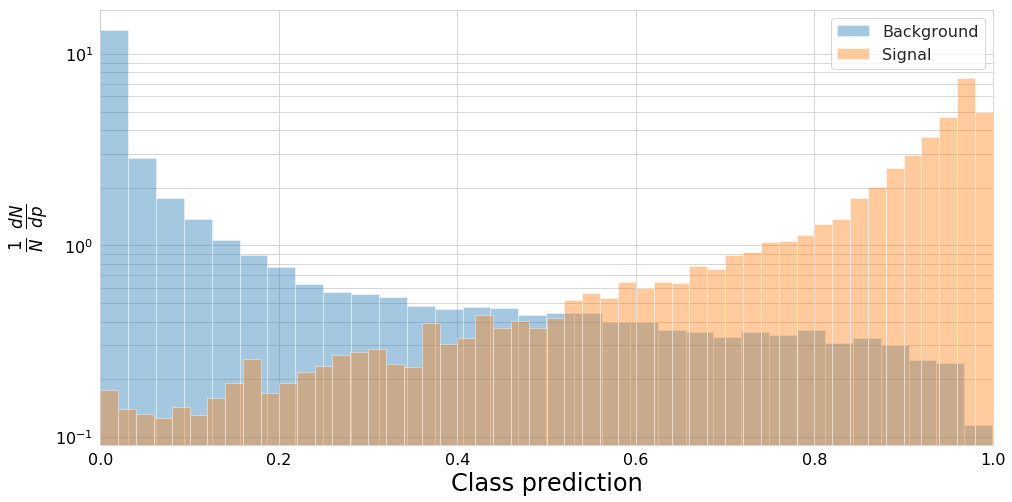

In [70]:
d = convertToDF(valData.source)
bkg_sig_dfs = [
    d[d['gen_target']==0],
    d[d['gen_target']==1],
]
getClassPredPlot(bkg_sig_dfs, weightName='gen_weight')

(50000, 'candidates loaded')
0 ROC AUC: 0.933283232346


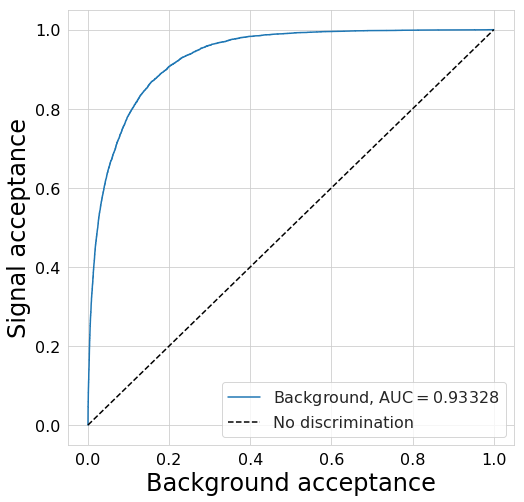

In [69]:
rocPlot([convertToDF(valData.source)], weightName='gen_weight', labels=['Background', 'Signal'])

(50000, 'candidates loaded')


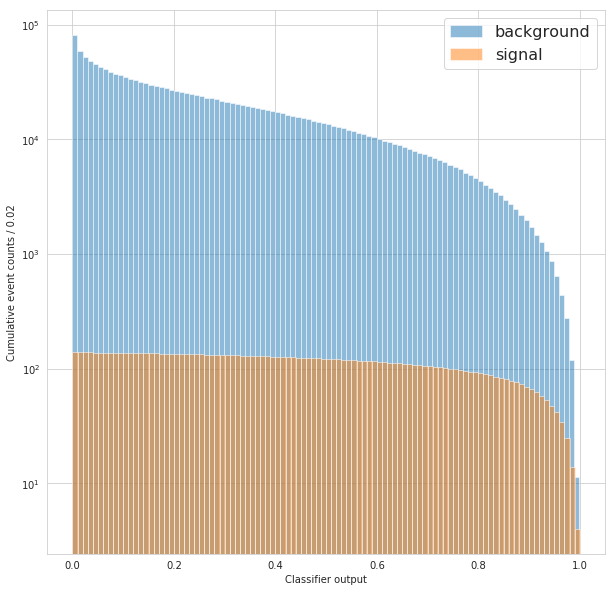

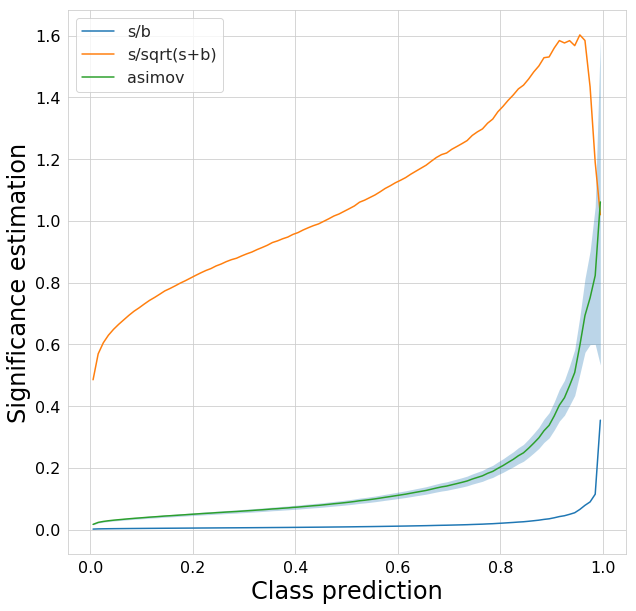

In [103]:
from numba import jit
from numpy import sqrt, log, power

syst = 0.1 

@jit(nopython=True)
def Z(s,b,sig=syst):
    return sqrt( -2.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)+ \
           2.0*( b+s)*log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))))

@jit(nopython=True)
def eZ(s,es,b,eb,sig=syst):
    return power(-(eb*eb)/( 1.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)-( b+s)*log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))))*power( 1.0/( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)/(sig*sig)*( 1.0/( b+(b*b)*(sig*sig))*(sig*sig)*s-b/power( b+(b*b)*(sig*sig),2.0)*(sig*sig)*( 2.0*b*(sig*sig)+1.0)*s)-( ( b+s)*( 2.0*b*(sig*sig)+1.0)/( (b*b)+( b+s)*(b*b)*(sig*sig))+( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))-( b+s)*( 2.0*( b+s)*b*(sig*sig)+2.0*b+(b*b)*(sig*sig))*( b+(b*b)*(sig*sig))/power( (b*b)+( b+s)*(b*b)*(sig*sig),2.0))/( b+(b*b)*(sig*sig))*( (b*b)+( b+s)*(b*b)*(sig*sig))-log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))),2.0)/2.0-1.0/( 1.0/(sig*sig)*log( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)-( b+s)*log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))))*power( log(( b+s)*( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig)))+1.0/( b+(b*b)*(sig*sig))*( ( b+(b*b)*(sig*sig))/( (b*b)+( b+s)*(b*b)*(sig*sig))-( b+s)*(b*b)*( b+(b*b)*(sig*sig))*(sig*sig)/power( (b*b)+( b+s)*(b*b)*(sig*sig),2.0))*( (b*b)+( b+s)*(b*b)*(sig*sig))-1.0/( b/( b+(b*b)*(sig*sig))*(sig*sig)*s+1.0)*b/( b+(b*b)*(sig*sig)),2.0)*(es*es)/2.0,(1.0/2.0))

# n_s,n_b number of events used for testing etc.
def wghtd_Z(scale_s,n_s,scale_b,n_b,sig=syst):
    return Z(scale_s*n_s,scale_b*n_b,sig)

def wghtd_eZ(scale_s,n_s,scale_b,n_b,sig=syst):
    return eZ(scale_s*n_s,scale_s*sqrt(n_s),scale_b*n_b,scale_b*sqrt(n_b),sig)


h1 = plotSignificanceEstimate(
    convertToDF(valData.source), 
    {
        's/b': lambda s,b: s/b,
        's/sqrt(s+b)': lambda s,b: s/np.sqrt(s+b),
        'asimov': lambda s,b: (Z(s,b), eZ(s,sqrt(s),b,sqrt(b))),
#        'asimov err': lambda s,b: eZ(s,sqrt(s),b,sqrt(b)),
    },
    weightName='gen_weight',
    figsize=(10, 10)
)

In [ ]:

    #
    # dnn.setup(
    #     hiddenLayers=config['hiddenLayers'],
    #     dropOut=config['dropOut'],
    #     l2Regularization=config['l2Regularization'],
    #     loss=significanceLoss2Invert(expectedSignal,expectedBkgd,weights=weightsInLoss),
    #     extraMetrics=[
    #         asimovSignificanceLossInvert(expectedSignal,expectedBkgd,chosenSyst),asimovSignificanceFull(expectedSignal,expectedBkgd,chosenSyst),
    #         significanceFull(expectedSignal,expectedBkgd),truePositive,falsePositive
    #     ],
    #     weightsInLoss=weightsInLoss
    # )
